In [1]:
# Importa o Sympy
import sympy as sp

# Importa o Numpy
import numpy as np

# Importa o Matplot lib
import matplotlib.pyplot as plt

# Importa o módulo Toolbox
import Toolbox as T

# Para solução numérica
import mpmath



In [2]:
# Equação Diferencial
# d²T/dx² = x ; x E (0,1)


# Define variável
x = sp.symbols('x')
x0 = 0
x1 = 1

# EDO
Temperatura = sp.Function('T')(x)
F = sp.Eq((sp.diff(Temperatura,x,2)),x)

print(sp.latex(F))

##Inicio da Função
# Integração da Resolução Analítica
T_analitico = sp.dsolve(F,Temperatura)

print(sp.latex(T_analitico))

# sp.pprint(T_analitico)

#Extraio o lado direito da equação
T_analitico = T_analitico.rhs

# Declaro as CCs
cc1 = sp.Eq(T_analitico.subs(x, 0), 1)
cc2 = sp.Eq(sp.diff(T_analitico,x).subs(x, 1), 0)

ccs = [cc1,cc2]

# Declaro as constantes
C1,C2 = sp.symbols('C1 C2')

CONSTS = [C1,C2]

#Resolvo para as constantes
constantes = sp.solve(ccs,CONSTS)

print(sp.latex(constantes))

T_analitico = T_analitico.subs(constantes)

print(sp.latex(T_analitico))
# Fim da Função

\frac{d^{2}}{d x^{2}} T{\left(x \right)} = x
T{\left(x \right)} = C_{1} + C_{2} x + \frac{x^{3}}{6}
\left\{ C_{1} : 1, \  C_{2} : - \frac{1}{2}\right\}
\frac{x^{3}}{6} - \frac{x}{2} + 1


In [ ]:
# Solução por Resíduos ponderados sem integração por partes:
# Base {1,x,x^2}

a0 = sp.symbols('a0')
a1 = sp.symbols('a1')
a2 = sp.symbols('a2')
a3 = sp.symbols('a3')

base = [a0,a1,a2,a3]

f_residuos_pond = a0+a1*x+a2*x**2+a3*x**3

# Aplico as condições de contorno

ccs_residuo = [
    sp.Eq(f_residuos_pond.subs(x, 0), 1),
    sp.Eq(sp.diff(f_residuos_pond, x).subs(x, 1), 0)
]
sp.pprint(ccs_residuo)

# Substituo as CC
cc_subs = sp.solve(ccs_residuo, base)

f_residuos_pond = f_residuos_pond.subs(cc_subs)

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_residuos_pond,x,2) - x
sp.pprint(residuo)

base_w = [1,x,x**2,x**3]

# Equações dos resíduos ponderados

equacoes_residuo = [sp.integrate(residuo*w,(x,x0,x1)) for w in base_w]

# print(sp.latex(equacoes_residuo))

sol = sp.solve(equacoes_residuo,base)

sp.pprint(sol)

f_residuos_pond = f_residuos_pond.subs(sol)



f_residuos_pond_1 = f_residuos_pond

print(sp.latex(f_residuos_pond_1))




[a₀ = 1, a₁ + 2⋅a₂ + 3⋅a₃ = 0]
-x + 2⋅(a₂ + 3⋅a₃⋅x)
{a₂: 0, a₃: 1/6}
\frac{x^{3}}{6} - \frac{x}{2} + 1


In [12]:
# Solução por Resíduos ponderados sem integração por partes:
# Base Polinomial
x = sp.symbols('x')

a0, a1, a2, a3,a4 = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1, a2, a3,a4)

# Base
f_base = a4 + a0*x+a1*x**2+a3*x**3

base_w = b4 + b0*x+b1*x**2+b3*x**3

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',0,1),('derivada',1,0)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) - x

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1, b2, b3,b4],[('valor',0,1),('derivada',1,0)])

equacoes_residuo = sp.integrate(residuo * base_w, (x, 0, 1)).expand()

eqs = [sp.collect(equacoes_residuo, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3,b4)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_1 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_1)

print(sp.latex(f_residuos_pond_1))


a_{0} x + a_{1} x^{2} + a_{3} x^{3} + a_{4}
a_{1} x^{2} + a_{3} x^{3} - x \left(2 a_{1} + 3 a_{3}\right) + 1
{a₁: 0, a₃: 1/6}
 3        
x    x    
── - ─ + 1
6    2    
\frac{x^{3}}{6} - \frac{x}{2} + 1


In [5]:
# Solução por Resíduos ponderados sem integração por partes:
# Base Senoidal
x = sp.symbols('x')

a0, a1, a2, a3, a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3, b4  = sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1, a2, a3,a4)

f_base = a4 + a0*sp.sin(sp.pi*x)+a1*sp.sin(2*sp.pi*x)+a2*sp.sin(3*sp.pi*x)+a3*sp.sin(4*sp.pi*x)
base_w = b4 + b0*sp.sin(sp.pi*x)+b1*sp.sin(2*sp.pi*x)+b2*sp.sin(3*sp.pi*x)+b3*sp.sin(4*sp.pi*x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',0,1),('derivada',1,0)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) - x

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1, b2, b3,b4],[('valor',0,1),('derivada',1,0)])

equacoes_residuo = sp.integrate(residuo * base_w, (x, 0, 1)).expand()

eqs = [sp.collect(equacoes_residuo, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3,b4)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_2 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_2)

print(sp.latex(f_residuos_pond_2))


a_{0} \sin{\left(\pi x \right)} + a_{1} \sin{\left(2 \pi x \right)} + a_{2} \sin{\left(3 \pi x \right)} + a_{3} \sin{\left(4 \pi x \right)} + a_{4}
a_{1} \sin{\left(2 \pi x \right)} + a_{2} \sin{\left(3 \pi x \right)} + a_{3} \sin{\left(4 \pi x \right)} + \left(2 a_{1} - 3 a_{2} + 4 a_{3}\right) \sin{\left(\pi x \right)} + 1
⎧     -61          47         -169  ⎫
⎪a₁: ──────, a₂: ──────, a₃: ───────⎪
⎨         3           3            3⎬
⎪    576⋅π       288⋅π       1152⋅π ⎪
⎩                                   ⎭
  371⋅sin(π⋅x)   61⋅sin(2⋅π⋅x)   47⋅sin(3⋅π⋅x)   169⋅sin(4⋅π⋅x)    
- ──────────── - ───────────── + ───────────── - ────────────── + 1
          3              3               3                3        
     288⋅π          576⋅π           288⋅π           1152⋅π         
- \frac{371 \sin{\left(\pi x \right)}}{288 \pi^{3}} - \frac{61 \sin{\left(2 \pi x \right)}}{576 \pi^{3}} + \frac{47 \sin{\left(3 \pi x \right)}}{288 \pi^{3}} - \frac{169 \sin{\left(4 \pi x \right)}}{1152 \pi^{3}

In [14]:
# Solução por Resíduos ponderados sem integração por partes:
# Base Exponencial
x = sp.symbols('x')

a0, a1, a2, a3, a4 = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3, b4= sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1, a2, a3, a4)

f_base = a4 + a0*sp.exp(x)+a1*sp.exp(2*x)+a2*sp.exp(3*x)+a3*sp.exp(4*x)

base_w = b4 + b0*sp.exp(x)+b1*sp.exp(2*x)+b2*sp.exp(3*x)+b3*sp.exp(4*x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',0,1),('derivada',1,0)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) - x

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1, b2, b3,b4],[('valor',0,1),('derivada',1,0)])

equacoes_residuo = sp.integrate(residuo * base_w, (x, 0, 1)).expand()

eqs = [sp.collect(equacoes_residuo, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3,b4)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_3 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_3)

f_residuos_pond_3.evalf()

print(sp.latex(f_residuos_pond_3.evalf()))


a_{0} e^{x} + a_{1} e^{2 x} + a_{2} e^{3 x} + a_{3} e^{4 x} + a_{4}
\frac{\left(1 - 2 e\right) \left(a_{2} e^{3 x} + a_{3} e^{4 x} + a_{4}\right) + \left(- a_{2} \left(1 - 3 e^{2}\right) - a_{3} \left(1 - 4 e^{3}\right) - a_{4} + 1\right) e^{2 x} + \left(a_{2} \left(2 - 3 e\right) + 2 a_{3} \left(1 - 2 e^{2}\right) + 2 a_{4} - 2\right) e^{x + 1}}{1 - 2 e}
⎧                        4            3            2                           ↪
⎪             - 1391180⋅ℯ  - 3163615⋅ℯ  - 2727480⋅ℯ  - 928970⋅ℯ + 62300 + 2915 ↪
⎨a₂: ───────────────────────────────────────────────────────────────────────── ↪
⎪             8          5          3         2                          4     ↪
⎩    - 11664⋅ℯ  - 72576⋅ℯ  - 38016⋅ℯ  - 3240⋅ℯ  - 2160 + 8640⋅ℯ + 84672⋅ℯ  + 2 ↪

↪    7           5           6                                           5     ↪
↪ 5⋅ℯ  + 405930⋅ℯ  + 172760⋅ℯ                                   - 85960⋅ℯ  - 2 ↪
↪ ──────────────────────────────────────, a₃: ────────────────────────────

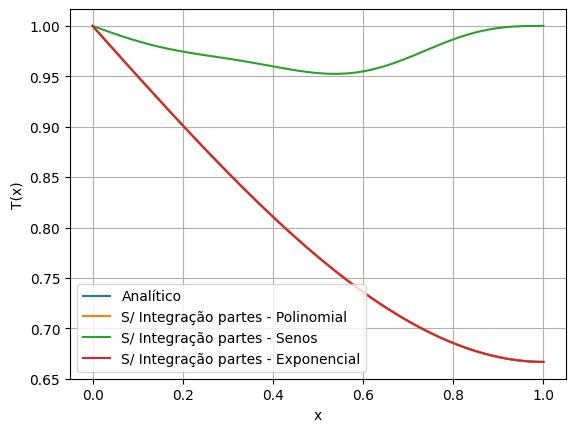

In [17]:
T.prepara_plot(T_analitico,x,x0,x1,"Analítico")
T.prepara_plot(f_residuos_pond_1,x,x0,x1,"S/ Integração partes - Polinomial")
T.prepara_plot(f_residuos_pond_2,x,x0,x1,"S/ Integração partes - Senos")
T.prepara_plot(f_residuos_pond_3,x,x0,x1,"S/ Integração partes - Exponencial")
plt.xlabel('x')
plt.ylabel('T(x)')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base Polinomial Completa
x = sp.symbols('x')

a0, a1, a2, a3, a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3, b4  = sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1,a2,a3,a4)

# Base
f_base = a4 + a0*x+a1*x**2+a3*x**3

base_w = b4 + b0*x+b1*x**2+b3*x**3

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',0,1),('derivada',1,0)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) - x


base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1,b2,b3,b4],[('valor',0,1),('derivada',1,0)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(x * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3,b4)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_4 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_4)

print(sp.latex(f_residuos_pond_4))



a_{0} x + a_{1} x^{2} + a_{3} x^{3} + a_{4}
a_{1} x^{2} + a_{3} x^{3} - x \left(2 a_{1} + 3 a_{3}\right) + 1
{a₁: 0, a₃: 1/6}
 3        
x    x    
── - ─ + 1
6    2    
\frac{x^{3}}{6} - \frac{x}{2} + 1


In [19]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base Polinomial incompleta
x = sp.symbols('x')

a0, a1, a2, a3  = sp.symbols('a0 a1 a2 a3')
b0, b1, b2, b3  = sp.symbols('b0 b1 b2 b3')

base = (a0,a1,a2)

# Base
f_base = a2 + a0*x+a1*x**2

base_w = b2 + b0*x+b1*x**2

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',0,1),('derivada',1,0)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) - x


base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0,b1,b2],[('valor',0,1),('derivada',1,0)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(x * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_5 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_5)

print(sp.latex(f_residuos_pond_5))



a_{0} x + a_{1} x^{2} + a_{2}
a_{1} x^{2} - 2 a_{1} x + 1
{a₁: 5/16}
   2          
5⋅x    5⋅x    
──── - ─── + 1
 16     8     
\frac{5 x^{2}}{16} - \frac{5 x}{8} + 1


In [31]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base seno + coseno
x = sp.symbols('x')

a0, a1, a2, a3  = sp.symbols('a0 a1 a2 a3')
b0, b1, b2, b3  = sp.symbols('b0 b1 b2 b3')

base = (a0,a1)

# Base
f_base = a0*sp.sin(sp.pi*x) + a1*sp.cos(sp.pi*x)

base_w = b0*sp.sin(sp.pi*x) + b1*sp.cos(sp.pi*x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',0,1),('derivada',1,0)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) - x


base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0,b1],[('valor',0,1),('derivada',1,0)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(x * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_6 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_6)

print(sp.latex(f_residuos_pond_6))



a_{0} \sin{\left(\pi x \right)} + a_{1} \cos{\left(\pi x \right)}
\cos{\left(\pi x \right)}
[]
cos(π⋅x)
\cos{\left(\pi x \right)}


In [34]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base exponencial
x = sp.symbols('x')

a0, a1, a2, a3  = sp.symbols('a0 a1 a2 a3')
b0, b1, b2, b3  = sp.symbols('b0 b1 b2 b3')

base = (a0,a1)

# Base
f_base = a0*sp.exp(x) + a1*sp.exp(-x)

base_w = b0*sp.exp(x) + b1*sp.exp(-x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',0,1),('derivada',1,0)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) - x


base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0,b1],[('valor',0,1),('derivada',1,0)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(x * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_7 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_7)

print(sp.latex(f_residuos_pond_7))


a_{0} e^{x} + a_{1} e^{- x}
\frac{\left(e^{2 x} + e^{2}\right) e^{- x}}{1 + e^{2}}
[]
⎛ 2⋅x    2⎞  -x
⎝ℯ    + ℯ ⎠⋅ℯ  
───────────────
         2     
    1 + ℯ      
\frac{\left(e^{2 x} + e^{2}\right) e^{- x}}{1 + e^{2}}


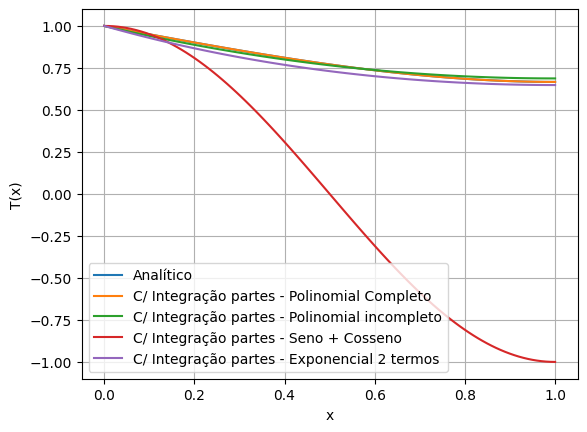

In [35]:
T.prepara_plot(T_analitico,x,x0,x1,"Analítico")
T.prepara_plot(f_residuos_pond_4,x,x0,x1,"C/ Integração partes - Polinomial Completo")
T.prepara_plot(f_residuos_pond_5,x,x0,x1,"C/ Integração partes - Polinomial incompleto")
T.prepara_plot(f_residuos_pond_6,x,x0,x1,"C/ Integração partes - Seno + Cosseno")
T.prepara_plot(f_residuos_pond_7,x,x0,x1,"C/ Integração partes - Exponencial 2 termos")
plt.xlabel('x')
plt.ylabel('T(x)')
plt.grid(True)
plt.legend()
plt.show()